<a href="https://colab.research.google.com/github/danielduartt/Pandas-Python/blob/main/Limpeza_de_dados_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statistics as sts

#**Preparação:**

In [174]:
df = pd.read_csv("/content/Churn.csv", sep = ";") #separando os dados por ";"
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


###**Dando nome as colunas**

In [175]:
df.columns = ['ID', "Score", "Estado", "Gênero", "Idade", "Patrimônio", "Saldo", "Produtos", "TemCardCredito", "Ativo", "Salário"
, "Saiu"]
df.head()

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


#**Análise Exploratória:**
##conhecendo os dados

In [176]:
df.shape #conhecendo o formato do DataFrame

(999, 12)

In [177]:
df.describe() #vendo uma descrição geral do DataFrame

,ID,Score,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


In [178]:
group_Estados = df.groupby(['Estado']).size() #agrupando os dados por Estado e vendo a ocorrência
#Percebe-se a existencia de estado errados
group_Estados

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

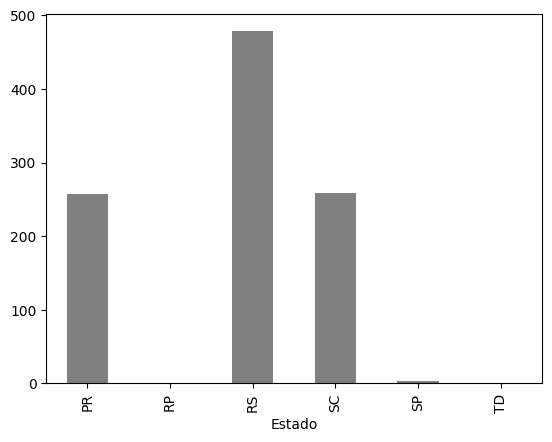

In [179]:
group_Estados.plot.bar(color = "gray") #criando um gráfico de barrar
#usando métodos do obj dataFrame do pandas

In [180]:
group_Genero = df.groupby(['Gênero']).size() #percebe-se que há dados identicos escritos de forma diferente
# F, Fem, Feminino representam o mesmo dado
# bem como, M e Masculino
group_Genero

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gênero'>

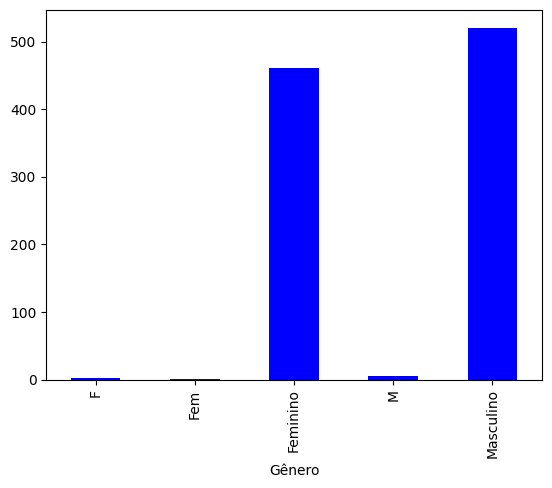

In [181]:
group_Genero.plot.bar(color = 'blue')

In [182]:
df['Score'].describe() #estou acessando o método describe a parte da Serie da coluna Score

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

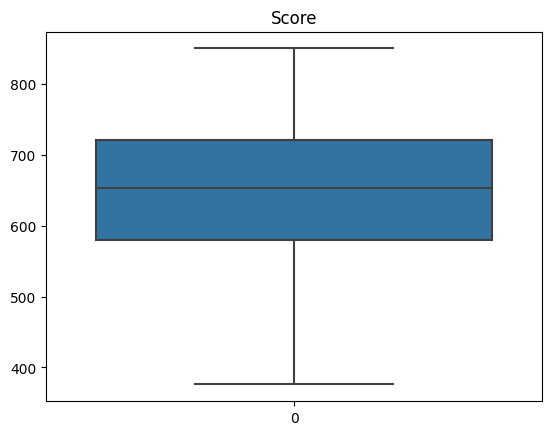

In [183]:
#criando um bloxPlot
import seaborn as snr
snr.boxplot(df['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

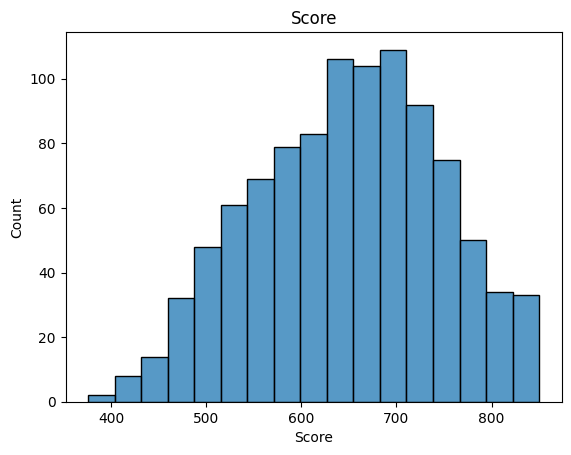

In [184]:
snr.histplot(df['Score']).set_title('Score') #Criando um histograma com os dados da coluna Score

In [185]:
#Idade
df['Idade'].describe() #Percebe-se um erro
# o valor máx é de 140 anos, o que não condiz ao valores reais
# além disso tem uma idade negativa

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

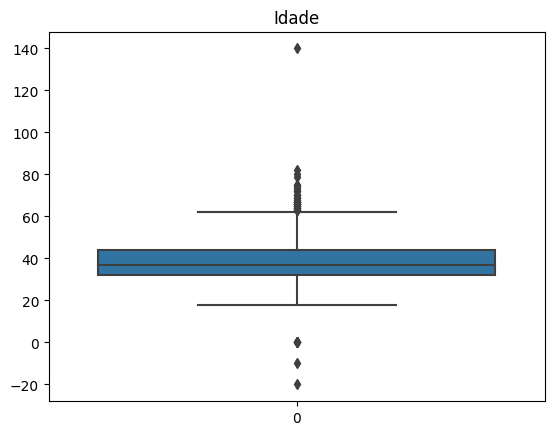

In [186]:
snr.boxplot(df['Idade']).set_title("Idade") #Percebe-se vários out-liers

Text(0.5, 1.0, 'Idade')

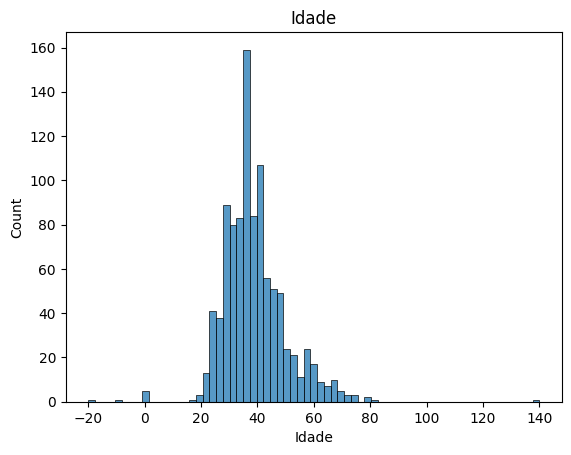

In [187]:
snr.histplot(df['Idade']).set_title("Idade")

In [188]:
#análise do saldo
df['Saldo'].describe() #percebe-se um desvio padrão alto

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

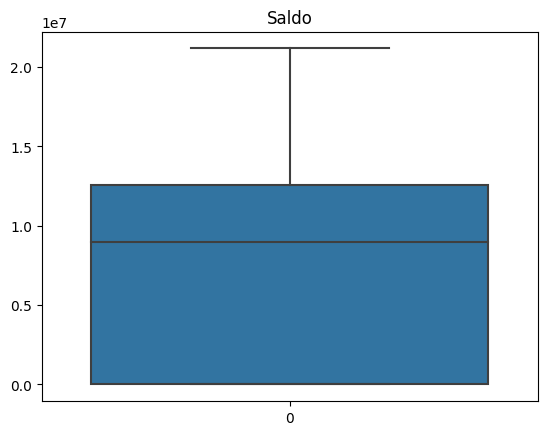

In [189]:
snr.boxplot(df['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

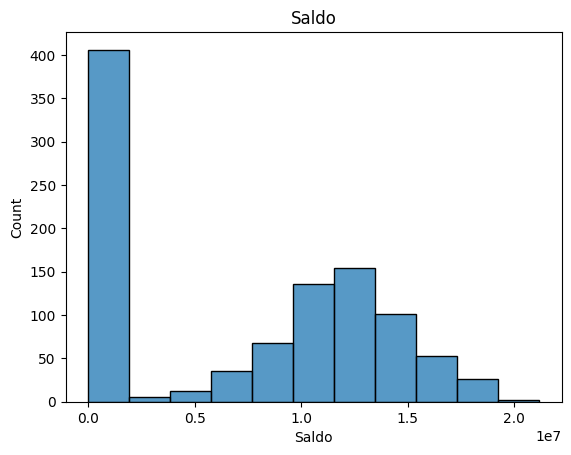

In [190]:
snr.histplot(df['Saldo']).set_title('Saldo')

In [191]:
df.groupby(['Saldo']).size()

Saldo
0           350
63227         1
82034         1
93147         1
127209        1
           ... 
19022746      1
19047948      1
19239052      1
20976731      1
21177431      1
Length: 649, dtype: int64

In [192]:
#analisando o Salário
df['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

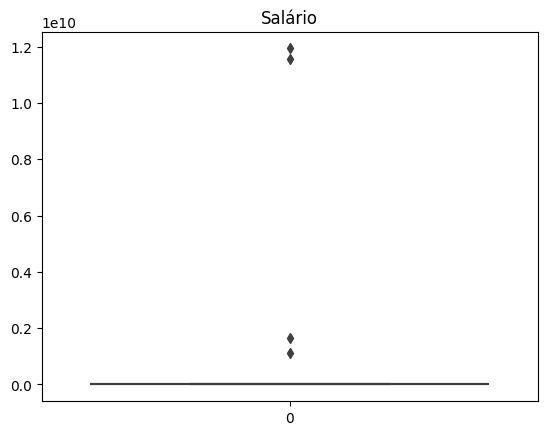

In [193]:
snr.boxplot(df['Salário']).set_title("Salário") #grande deformação de 0
# agora esses pontos são out-liers???

<ipython-input-194-813471095b1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snr.distplot(df['Salário']) #usei o distplot para ficar mais visível


<Axes: xlabel='Salário', ylabel='Density'>

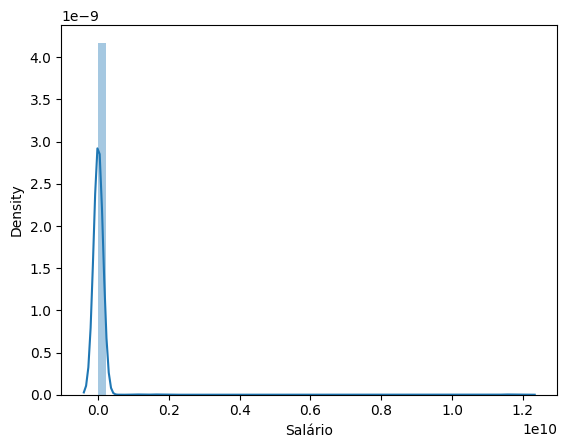

In [194]:
snr.distplot(df['Salário']) #usei o distplot para ficar mais visível
#apesar de ser indicado a usar o displot ou o histplot
#O histplot não ficou muito visível

In [195]:
#Ver se há valores nulos
df.isnull().sum() #Há valores nulos na coluna salário e na coluna genero

ID                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCardCredito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

#**Tratamento de Dados:**

In [196]:
#Resolvendos o Valores Nulos nas colunas salario e genero
mean_salario = sts.median(df['Salário'])
df['Salário'].fillna(mean_salario, inplace = True)
df['Salário'].isnull().sum() #Mostrando que não há mais valores nulos nessa coluna

0

In [197]:
df.groupby(['Gênero']).size() #antes de resolver o problema com os nomes
#vamos retirar os valores nulos, definindo-os com a moda

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [198]:
df['Gênero'].fillna('Masculino', inplace = True )
df['Gênero'].isnull().sum()

0

In [199]:
#padronizando os valores
df.loc[df['Gênero' ].isin(['F', 'Fem']), 'Gênero'] = "Feminino"
df.loc[df['Gênero'] == "M", 'Gênero'] = 'Masculino'

In [200]:
df.groupby("Gênero").size()

Gênero
Feminino     464
Masculino    535
dtype: int64

In [201]:
df.isnull().sum()

ID                0
Score             0
Estado            0
Gênero            0
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCardCredito    0
Ativo             0
Salário           0
Saiu              0
dtype: int64

In [202]:
#!!Problemas resolvidos!!, agora vamos resolver os outros.........

In [203]:
df['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [204]:
df.loc[df['Idade'] < 0]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0


In [205]:
df.drop([867,984], axis = 0, inplace = True)

In [206]:
df.loc[df['Idade'] > 80]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
766,768,700,RS,Feminino,82,2,0,2,0,1,18205536.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [207]:
df.drop(990, axis = 0, inplace = True)

In [208]:
#Dados Com ID duplicado
df[df.duplicated(['ID'], keep = False)]#verificando se há dados duplicados com relação ao ID

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [209]:
#Excluindo esses Ids repetivos
df.drop_duplicates(subset = "ID", keep = 'first', inplace = True) #usando o método drop_dublicates
#passando a coluna e dizendo que é para manter o primeiro

In [210]:
df[df.duplicated(['ID'], keep = False)] #percebe-se que não há mais dados duplicados

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu


In [211]:
#Resolvendo o problema dos Estados Fora do Domínio
df.groupby(['Estado']).size()

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [212]:
df.loc[df['Estado'].isin(['RP', 'TD', 'SP']), 'Estado'] = 'RS' #RS pq é a moda
df.groupby(['Estado']).size()

Estado
PR    257
RS    480
SC    258
dtype: int64

In [213]:
#percebe-se valores muito mais altos que a média
df['Salário'].describe()

count    9.950000e+02
mean     3.514555e+07
std      5.297842e+08
min      9.677000e+03
25%      2.856485e+06
50%      8.641028e+06
75%      1.402954e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [214]:
desp = df['Salário'].std()
df.loc[df['Salário'] >= 2 * desp]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [215]:
mediana = df['Salário'].mean()
df.loc[df['Salário'] >= 2 * desp] = mediana
df.loc[df['Salário'] >= 2 * desp]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu


In [216]:
df.head()

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
0,1.0,619.0,RS,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2.0,608.0,SC,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,RS,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4.0,699.0,RS,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,SC,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0


In [217]:
df.shape

(995, 12)

In [218]:
df.loc[df['Saiu'] == 1, "Saiu"] = True
df.loc[df['Saiu'] == 0, "Saiu"] = False
display(df.head())

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
0,1.0,619.0,RS,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,True
1,2.0,608.0,SC,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,False
2,3.0,502.0,RS,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,True
3,4.0,699.0,RS,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,False
4,5.0,850.0,SC,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,False
